**MASKRCNN**

In [1]:
!git clone https://github.com/matterport/Mask_RCNN.git

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 21.31 MiB/s, done.
Resolving deltas: 100% (558/558), done.


Import all the libraries 

In [2]:
import os 
os.chdir('Mask_RCNN/samples')

In [4]:
!pip install mrcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 51 kB 301 kB/s 
  Created wheel for mrcnn: filename=mrcnn-0.2-py3-none-any.whl size=54931 sha256=65863800ff9a97d73dc2f626e4ba697e367034c8c23491bf7abd12ba016ee3ea
  Stored in directory: /root/.cache/pip/wheels/ff/1b/2e/f361d17d566062f419fcfd88697e7159c90dbb9627372914b0
Successfully built mrcnn


In [11]:
import os
import sys
import skimage.io
import matplotlib
import matplotlib.pyplot as plt

ROOT_DIR = os.path.abspath("./")
sys.path.append(ROOT_DIR)
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
from samples.coco import coco


/usr/local/lib/python3.8/dist-packages/mrcnn/model.py:2337: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


In [22]:
import cv2
from matplotlib import pyplot as plt

In [6]:
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
# Directory of images to run detection on
IMAGE_DIR = os.path.join(ROOT_DIR, "images")

... done downloading pretrained model!


loading the dataset

In [14]:
!wget http://images.cocodataset.org/zips/train2014.zip
!unzip -q train2014.zip
!wget http://images.cocodataset.org/zips/val2014.zip
!wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
!unzip -q val2014.zip
!unzip -q annotations_trainval2014.zip


! pip install 2to3
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi
!2to3 . -w
%cd PythonAPI
!python3 setup.py install


--2022-12-07 18:05:44--  http://images.cocodataset.org/zips/train2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.168.89, 52.217.102.12, 3.5.10.182, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.168.89|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13510573713 (13G) [application/zip]
Saving to: ‘train2014.zip’

train2014.zip       100%[===================>]  12.58G  37.5MB/s    in 5m 46s  

2022-12-07 18:11:30 (37.3 MB/s) - ‘train2014.zip’ saved [13510573713/13510573713]

--2022-12-07 18:13:59--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.83.172, 52.217.225.113, 52.216.33.105, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.83.172|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6645013297 (6.2G) [application/zip]
Saving to: ‘val2014.zip’

val2014.zip         100%[===================>]  

In [13]:
class_names = ['screwdrivers', 'workbench', 'pliers', 'hammer', 'wallpanel', 'storagecabinets',
               'totes']

In [12]:
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

IMPLEMENTING THE MODEL MASKRCNN 
MASK_RCNN_COCO.H5


In [ ]:
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
model.load_weights(COCO_MODEL_PATH, by_name=True)

In [ ]:
 dataset_train= InferenceConfig(path_input = "/content/train2014" , path_mask = "/content/mask_train_2014/" , batch_size = batch_size , image_size = image_size)
dataset_val = InferenceConfig(path_input =  "/content/val2014", path_mask =  "/content/mask_val_2014", batch_size = batch_size , image_size = image_size)


In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            layers='heads')

In [ ]:

# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=2, 
            layers="all")


In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))
 


     

In [32]:
original= cv2.imread('/content/p2.jpeg')
results= cv2.imread('/content/p1.jpeg')


In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())




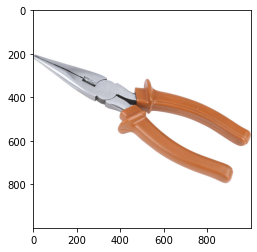

In [36]:
plt.imshow(original)



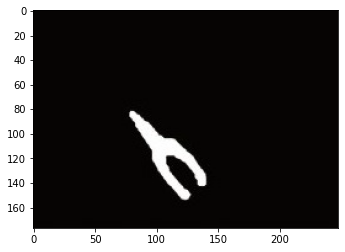

In [37]:
plt.imshow(results)

 **FOR REAL TIME USING CAMERA**

In [18]:
!pip install pixellib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 430 kB 7.6 MB/s 
     |████████████████████████████████| 8.4 MB 46.0 MB/s 
     |████████████████████████████████| 79 kB 9.7 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 50 kB 7.3 MB/s 
     |████████████████████████████████| 151 kB 59.8 MB/s 
     |████████████████████████████████| 1.5 MB 49.8 MB/s 
     |████████████████████████████████| 96 kB 6.6 MB/s 
     |████████████████████████████████| 117 kB 45.3 MB/s 
     |████████████████████████████████| 94 kB 3.4 MB/s 
     |████████████████████████████████| 87 kB 7.6 MB/s 
     |████████████████████████████████| 3.2 MB 50.4 MB/s 
     |████████████████████████████████| 97 kB 7.3 MB/s 
     |████████████████████████████████| 59.9 MB 1.3 MB/s 
     |████████████████████████████████| 361 kB 52.3 MB/s 
  Created wheel for fvcore: filename=fvcore-0.

In [19]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import tensorflow

In [ ]:
import pixellib
from pixellib.instance import instance_segmentation

segment_image = instance_segmentation()
segment_image.load_model("mask_rcnn_coco.h5") 
segment_image.segmentImage("d1.jpg", output_image_name = "image_new.jpg")

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Apply instance segmentation
    res = segment_image.segmentFrame(frame, show_bboxes=True)
    image = res[1]
    
    cv2.imshow('Instance Segmentation', image)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [38]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-extra
  texlive-latex-recommended texlive-pictures tipa
Suggested packages:
  fonts-noto apache2 | lighttpd | httpd poppler-utils ghostscript
  fonts-japanese-mi